In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon


In [2]:
# Load R² results for bulk and SC
bulk = pd.read_csv("results/elastic_net/elastic_net_results_bulk.csv")
sc = pd.read_csv("results/elastic_net/elastic_net_results_sc.csv")

# Keep only what's needed and rename columns
bulk = bulk[["DRUG_ID", "r2_mean"]].rename(columns={"r2_mean": "r2_bulk"})
sc = sc[["DRUG_ID", "r2_mean"]].rename(columns={"r2_mean": "r2_sc"})


In [3]:
df_merged = pd.merge(bulk, sc, on="DRUG_ID", how="inner")
print("✅ Merged results shape:", df_merged.shape)
df_merged.head()


✅ Merged results shape: (447, 3)


,DRUG_ID,r2_bulk,r2_sc
0,133,-0.044674,-0.042277
1,134,-0.104149,-0.124497
2,135,-0.024399,0.036983
3,136,-0.160812,-0.163914
4,140,-0.017948,-0.053745


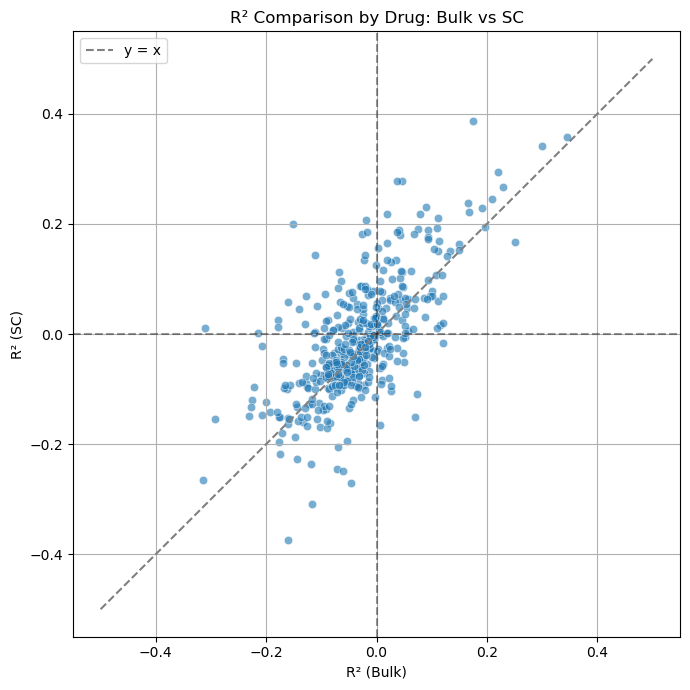

In [4]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_merged, x="r2_bulk", y="r2_sc", alpha=0.6)

plt.plot([-0.5, 0.5], [-0.5, 0.5], '--', color='gray', label="y = x")
plt.axhline(0, linestyle="--", color="black", alpha=0.4)
plt.axvline(0, linestyle="--", color="black", alpha=0.4)

plt.xlabel("R² (Bulk)")
plt.ylabel("R² (SC)")
plt.title("R² Comparison by Drug: Bulk vs SC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
# How many drugs each method is better on
n_sc_better = (df_merged["r2_sc"] > df_merged["r2_bulk"]).sum()
n_bulk_better = (df_merged["r2_bulk"] > df_merged["r2_sc"]).sum()

print(f"📈 SC better on: {n_sc_better} drugs")
print(f"📉 Bulk better on: {n_bulk_better} drugs")

# Average R² difference
df_merged["r2_diff"] = df_merged["r2_sc"] - df_merged["r2_bulk"]
print(f"📊 Mean ΔR² (SC - Bulk): {df_merged['r2_diff'].mean():.4f}")


📈 SC better on: 266 drugs
📉 Bulk better on: 181 drugs
📊 Mean ΔR² (SC - Bulk): 0.0199


In [6]:
stat, p_value = wilcoxon(df_merged["r2_sc"], df_merged["r2_bulk"])
print(f"🧪 Wilcoxon signed-rank test p-value: {p_value:.4f}")


🧪 Wilcoxon signed-rank test p-value: 0.0000


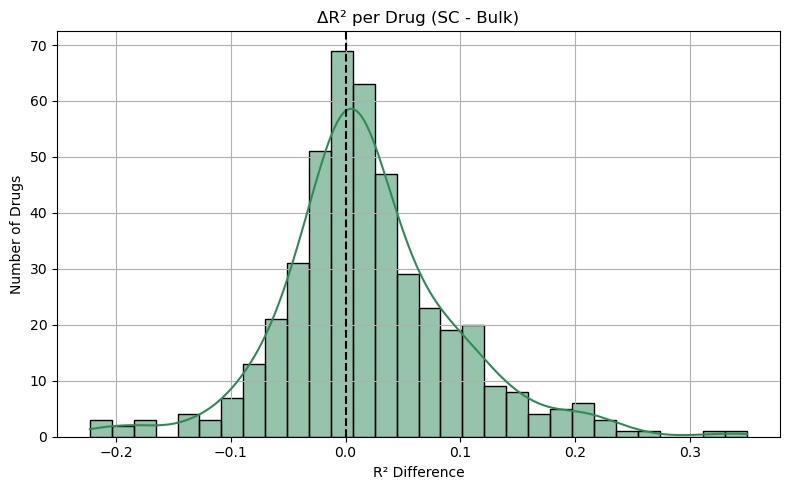

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df_merged["r2_diff"], kde=True, bins=30, color="seagreen")
plt.axvline(0, linestyle="--", color="black")
plt.title("ΔR² per Drug (SC - Bulk)")
plt.xlabel("R² Difference")
plt.ylabel("Number of Drugs")
plt.grid(True)
plt.tight_layout()
plt.show()
